# Inkrementacyjną indukcja drzew decyzyjnych
Jakub Sobolewski

Jakub Płudowski

In [1]:
from ID3 import ID3
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def test(X, y, iters = 1, batch = 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    new_data_parts = int(np.floor(len(X_train)/batch))

    accuracy_train = np.zeros((new_data_parts-1,))
    accuracy_test = np.zeros((new_data_parts-1,))

    for _ in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
        for i in range(1,new_data_parts):
            to_where = 10*i
            X_curr, y_curr = X_train[0:to_where], y_train[0:to_where]

            model = ID3()
            model.fit(X_curr, y_curr)

            preds = model.predict(X_curr)
            accuracy_train[i-1] += accuracy_score(preds, y_curr)

            preds = model.predict(X_test)
            accuracy_test[i-1] += accuracy_score(preds, y_test)

    accuracy_train /= iters
    accuracy_test /= iters

    xAxis = (np.arange(1, new_data_parts))*batch
    plt.plot(xAxis, accuracy_test*100)
    plt.plot(xAxis, accuracy_train*100)
    plt.xlabel('data samples')
    plt.ylabel('accuracy')
    plt.legend(['test','train'])

# Breast

In [41]:
breast = pd.read_csv("breast-cancer.csv")
X = breast.drop(columns='Class')
y = breast['Class'].values

# 1 iteracja
* żeby zobaczyć jak zaszumione będą wyniki
* jak konkretne ułożenie danych wpływa na wynik

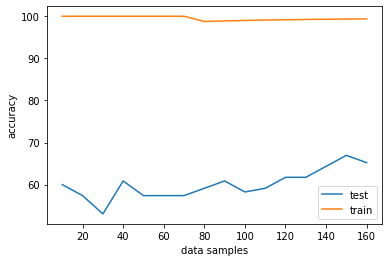

In [51]:
test(X, y, iters = 1, batch = 10)

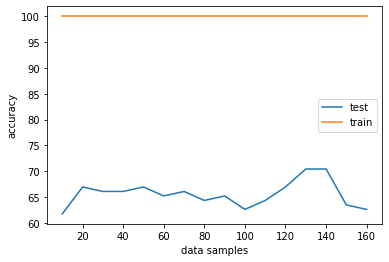

In [52]:
test(X, y, iters = 1, batch = 10)

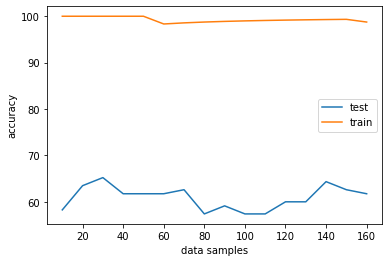

In [53]:
test(X, y, iters = 1, batch = 10)

# Wnioski na podstawie jednej iteracji
accuracy test:
* tak na oko zaszumienie około std 5% accuracy
* nie zawsze końcowe accuracy jest takie samo => kolejność danych nie wpływa na ostateczny wynik ale jakie dane zostały wykorzystane już znacząco wpływa

accuracy train:
* tu nie ma aż tak ciekawych wniosków, zgodnie z przewidywaniami accuracy maleje, model zazwyczaj się przeucza dopasowywując się do konkretnych danych

# 10 iteracji
Sprawdzenie jak statystycznie zmienia się accuracy wraz z większą ilością danych

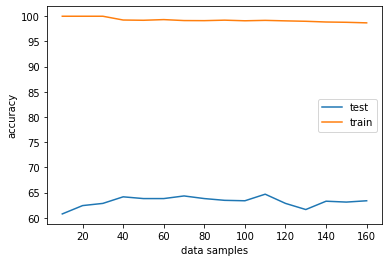

In [54]:
test(X, y, iters = 10, batch = 10)

# Wnioski
10 iteracji to i tak mało by się w całości pozbyc szumu ale widać wyraźnie trend accuracy rośnie. Szczególnie na początku więcej danych drastycznie poprawia jakość.

# Schrooms


In [61]:
schrooms = pd.read_csv("agaricus-lepiota.csv")
X = schrooms.drop(columns='Class')
y = schrooms['Class'].values

# 1 iteracja

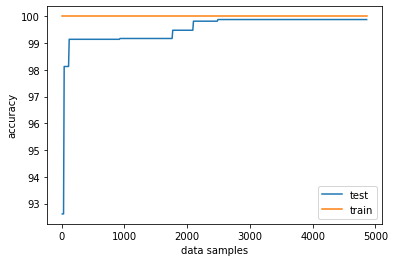

In [62]:
test(X, y, iters = 1, batch = 10)

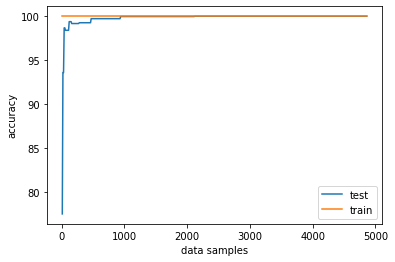

In [63]:
test(X, y, iters = 1, batch = 10)

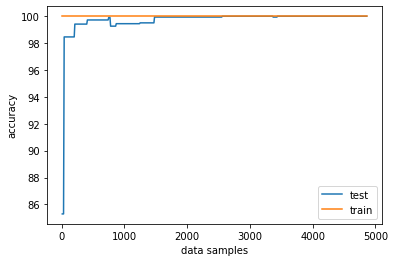

In [64]:
test(X, y, iters = 1, batch = 10)

# 10 Iteracji

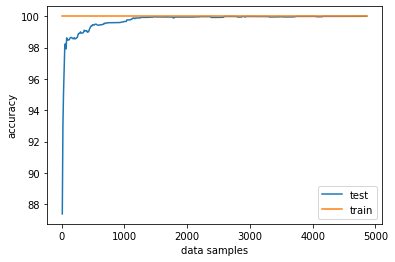

In [65]:
test(X, y, iters = 10, batch = 10)

# Dane posortowane

In [3]:
def test_not_shuffled(X, y, iters = 1, batch = 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)
    new_data_parts = int(np.floor(len(X_train)/batch))

    accuracy_train = np.zeros((new_data_parts-1,))
    accuracy_test = np.zeros((new_data_parts-1,))

    for _ in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)
        for i in range(1,new_data_parts):
            to_where = 10*i
            X_curr, y_curr = X_train[0:to_where], y_train[0:to_where]

            model = ID3()
            model.fit(X_curr, y_curr)

            preds = model.predict(X_curr)
            accuracy_train[i-1] += accuracy_score(preds, y_curr)

            preds = model.predict(X_test)
            accuracy_test[i-1] += accuracy_score(preds, y_test)

    accuracy_train /= iters
    accuracy_test /= iters

    xAxis = (np.arange(1, new_data_parts))*batch
    plt.plot(xAxis, accuracy_test*100)
    plt.plot(xAxis, accuracy_train*100)
    plt.xlabel('data samples')
    plt.ylabel('accuracy')
    plt.legend(['test','train'])

In [19]:
schrooms = pd.read_csv("agaricus-lepiota.csv")
schrooms.sort_values(by=[schrooms.columns[0]], inplace=True)
X = schrooms.drop(columns='Class')
y = schrooms['Class'].values

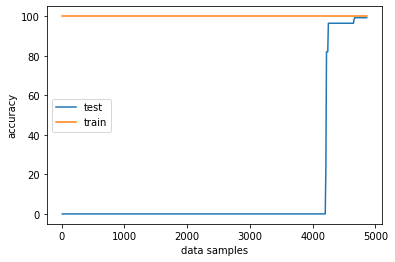

In [20]:
test_not_shuffled(X, y, iters = 1, batch = 10)

przypadek ekstremany, dane treningowe i dane testowa mają inny rozkład, czyli tak jakbyśmy trenowali model na danych, które nieozwierciedlają zjawiska

pod koniec zaczynają się pojawiać dane reprezentatywne, jakośc modelu wtedy rosnie

# Kolejny test:
dane treningowe posortowane ale zbiór walidacyjny reprezenttatywny, czyli wybrany losowo, a nie koniec posorotwanej części danych

In [33]:
def test_not_shuffled_representative_val(X, y, X_val, y_val, batch = 10):
    X_train, y_train = X, y
    new_data_parts = int(np.floor(len(X_train)/batch))

    accuracy_train = np.zeros((new_data_parts-1,))
    accuracy_val = np.zeros((new_data_parts-1,))

    for i in range(1,new_data_parts):
        to_where = 10*i
        X_curr, y_curr = X_train[0:to_where], y_train[0:to_where]

        model = ID3()
        model.fit(X_curr, y_curr)

        preds = model.predict(X_curr)
        accuracy_train[i-1] += accuracy_score(preds, y_curr)

        preds = model.predict(X_val)
        accuracy_val[i-1] += accuracy_score(preds, y_val)

    xAxis = (np.arange(1, new_data_parts))*batch
    plt.plot(xAxis, accuracy_train*100)
    plt.plot(xAxis, accuracy_val*100)
    plt.xlabel('data samples')
    plt.ylabel('accuracy')
    plt.legend(['train','val'])

In [30]:
schrooms = pd.read_csv("agaricus-lepiota.csv")
schrooms_shuffled = schrooms.sample(frac=1).reset_index(drop=True)

schrooms_train = schrooms_shuffled[1:6000]
schrooms_train.sort_values(by=[schrooms_train.columns[0]], inplace=True)
X = schrooms_train.drop(columns='Class')
y = schrooms_train['Class'].values

schrooms_val = schrooms_shuffled[6000:]
X_val = schrooms_val.drop(columns='Class')
y_val = schrooms_val['Class'].values


C:\Users\QbaSo\AppData\Local\Temp\ipykernel_16332\1765126279.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schrooms_train.sort_values(by=[schrooms_train.columns[0]], inplace=True)


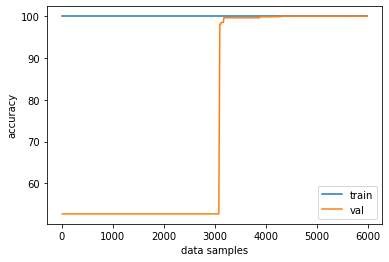

In [35]:
test_not_shuffled_representative_val(X, y, X_val, y_val, 10)

jak widac dużo wcześniej jakość modelu poprawiła się

# Wnioski końcowe
* dane ze zbioru brest są bardziej zaszumione, mało na nich widać wpływ przeprowadzonych eksperymentów
* dane ze zbiory schrooms są mało zaszumione i gdy wybierze się nie reprezentatywny zbiór uczący wyraźnie widać tego wpływ
* przy zaszumionych danych większa ilość danych nie poprawia jakośći modelu
* przy niezaszumionych danych większa ilość danych poprawia jakość modelu w sposób zaczący
* mimo, że drzewo decyzyjne potrzebuje raczej mało danych do nauki, to większa ilość danych zawsze powoduje bardziej lub mniej znaczną pooprawę modelu
* zostały zasymulowane użycia modeli do zastosowań nie stacjonarnych, modele z czasem adaprowały się do zjawiska (gdy zaczynały dostawać reprezentatywne dane)